---
# Functional Model
<span id="Importmodules"></span>

---

In [ ]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from tensorflow.keras.layers import Input


# Load the features extracted previously
X_train_features, y_train_labels = joblib.load('train_split.joblib')
X_val, y_val = joblib.load('val_split.joblib')
X_test_features, y_test_labels = joblib.load('test.joblib')

input_shape = X_train_features.shape[1]  # The number of features per sample (1024 in this case)
num_classes = y_train_labels.shape[1] # If the labels are not already one-hot encoded, we can one-hot encode them

# Define the model for classification
input_layer = Input(shape=(input_shape,))  # This is the shape of the features (1024,)
x = Dropout(0.5)(input_layer)  # Dropout to reduce overfitting
x = Dense(1024, activation='relu')(x)  # Fully connected layer with ReLU activation
x = Dropout(0.5)(x)  # Another Dropout layer
output_layer = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax for multi-class classification

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_features, y_train_labels, 
                    epochs=5, batch_size=32, 
                    validation_data=(X_val, y_val))


Epoch 1/5
57/57 [==============================] - 3s 30ms/step - loss: 2.6434 - accuracy: 0.2978 - val_loss: 0.9743 - val_accuracy: 0.7947
Epoch 2/5
57/57 [==============================] - 1s 22ms/step - loss: 1.1869 - accuracy: 0.6293 - val_loss: 0.4862 - val_accuracy: 0.8698
Epoch 3/5
57/57 [==============================] - 1s 17ms/step - loss: 0.8218 - accuracy: 0.7337 - val_loss: 0.4146 - val_accuracy: 0.8764
Epoch 4/5
57/57 [==============================] - 1s 17ms/step - loss: 0.6611 - accuracy: 0.7779 - val_loss: 0.2928 - val_accuracy: 0.9029
Epoch 5/5
57/57 [==============================] - 1s 17ms/step - loss: 0.4988 - accuracy: 0.8320 - val_loss: 0.2433 - val_accuracy: 0.8962


---
# Plot training and validation accuracy
<span id="Importmodules"></span>

---

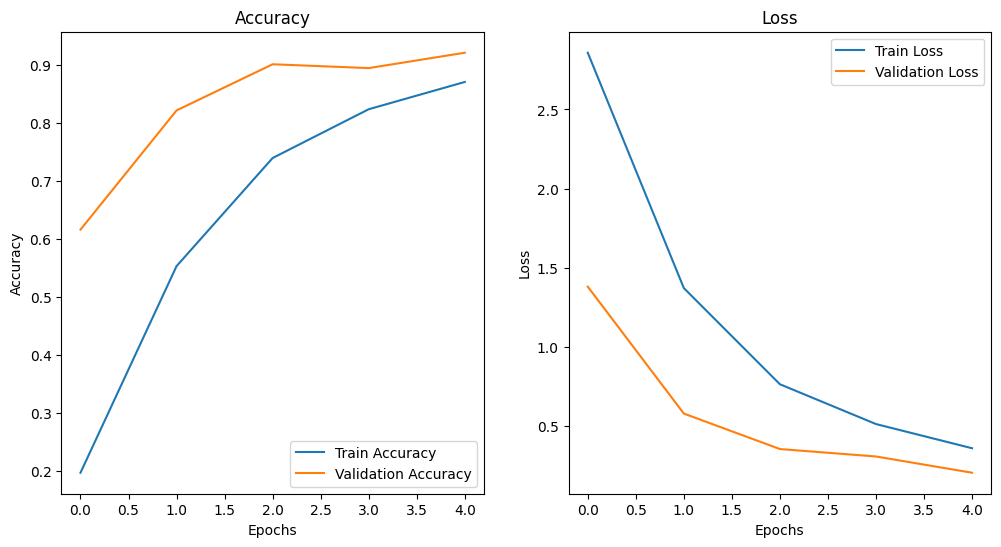

In [67]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [68]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_features, y_test_labels, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_labels, axis=1)

8/8 [==============================] - 0s 7ms/step - loss: 0.1654 - accuracy: 0.9365
Test accuracy: 0.9365
Test loss: 0.1654
8/8 [==============================] - 0s 6ms/step


---
# Confusion Matrix and Classification Report
<span id="Importmodules"></span>

---

Confusion Matrix:
[[5 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 0 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       0.47      1.00      0.64         7
           7       0.78      1.00      0.88         7
           8       1.00      0.71      0.83         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         7
          14       0.88     

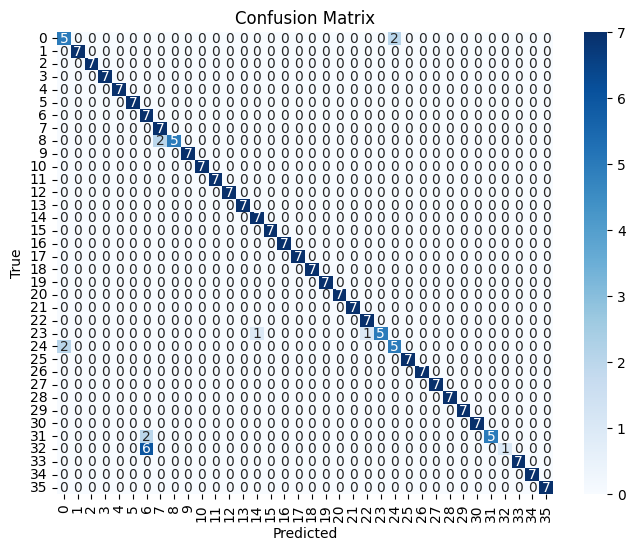

In [69]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

---
# Sequential Model
<span id="Importmodules"></span>

---

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib


# Load the features and labels for train, validation, and test sets
X_train_features, y_train_labels = joblib.load('train_split.joblib')
X_val, y_val = joblib.load('val_split.joblib')
X_test_features, y_test_labels = joblib.load('test.joblib')

# Print the shape of the features to confirm
print(f"X_train_features shape: {X_train_features.shape}")
print(f"y_train_labels shape: {y_train_labels.shape}")
print(f"X_test_features shape: {X_test_features.shape}")
print(f"y_test_labels shape: {y_test_labels.shape}")

# Define the fully connected model for the extracted features
model = Sequential()

# Input layer (feature vectors of size 1024)
model.add(Dense(1024, activation='relu', input_shape=(X_train_features.shape[1],)))
model.add(Dropout(0.3))  # Dropout to reduce overfitting

# Hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer (number of classes)
model.add(Dense(y_train_labels.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_features, y_train_labels, 
                    epochs=5, batch_size=32, 
                    validation_data=(X_val, y_val))

X_train_features shape: (1810, 1024)
y_train_labels shape: (1810, 36)
X_test_features shape: (252, 1024)
y_test_labels shape: (252, 36)
Epoch 1/5
57/57 [==============================] - 4s 31ms/step - loss: 2.8577 - accuracy: 0.2122 - val_loss: 1.4707 - val_accuracy: 0.5717
Epoch 2/5
57/57 [==============================] - 1s 26ms/step - loss: 1.2768 - accuracy: 0.5818 - val_loss: 0.5896 - val_accuracy: 0.8057
Epoch 3/5
57/57 [==============================] - 1s 25ms/step - loss: 0.6943 - accuracy: 0.7519 - val_loss: 0.4338 - val_accuracy: 0.8565
Epoch 4/5
57/57 [==============================] - 1s 26ms/step - loss: 0.4789 - accuracy: 0.8249 - val_loss: 0.3196 - val_accuracy: 0.8874
Epoch 5/5
57/57 [==============================] - 1s 25ms/step - loss: 0.3469 - accuracy: 0.8851 - val_loss: 0.2358 - val_accuracy: 0.9073


In [71]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_features, y_test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

8/8 [==============================] - 0s 6ms/step - loss: 0.1201 - accuracy: 0.9563
Test accuracy: 0.9563
Test loss: 0.1201


---
# Plot training and validation accuracy
<span id="Importmodules"></span>

---

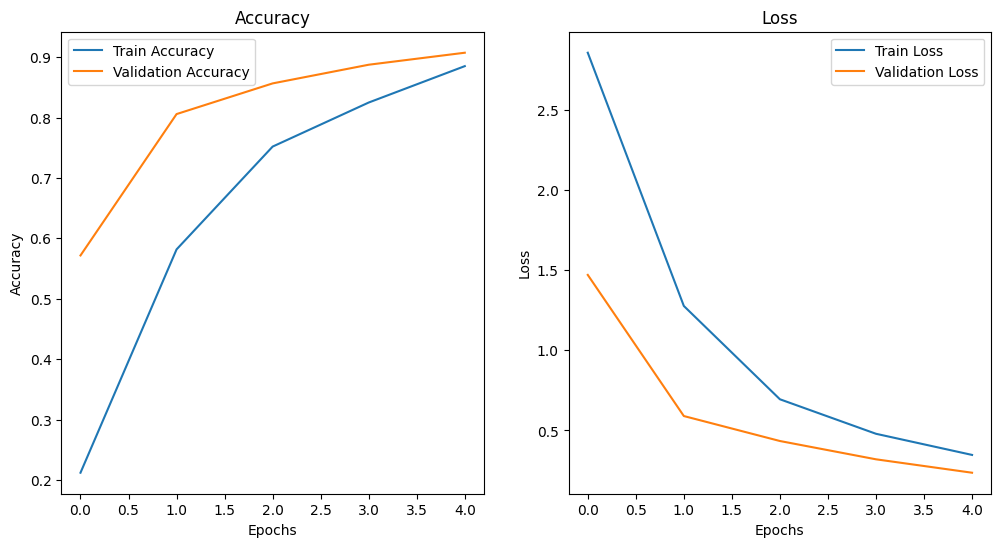

In [73]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

---
# Confusion Matrix and Classification Report
<span id="Importmodules"></span>

---

8/8 [==============================] - 0s 6ms/step
Confusion Matrix:
[[7 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 0 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      1.00      1.00         7
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      0.29      0.44         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         7
          13       1.00      1.

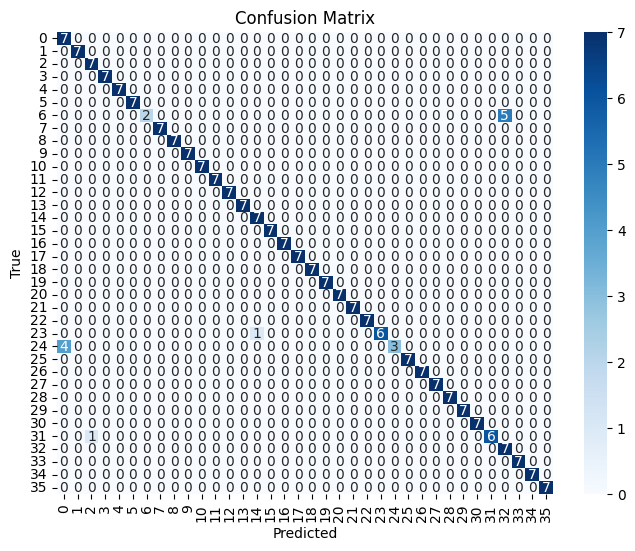

In [74]:
# Make predictions on the test set
y_pred = model.predict(X_test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_labels, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [75]:
model.save('cnn_model.h5')
from tensorflow.keras.models import load_model
model = load_model('cnn_model.h5')

In [23]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [76]:
import torch
import torch.nn as nn
import torch.optim as optim

In [77]:
class FullyConnectedModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FullyConnectedModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(512, 256)
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(256, num_classes)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

import tensorflow as tf

model_h5 = tf.keras.models.load_model('cnn_model.h5')

model_h5.summary()

import numpy as np
input_size = model_h5.input_shape[1]  
num_classes = model_h5.output_shape[1] 
pytorch_model = FullyConnectedModel(input_size, num_classes)

with torch.no_grad():

    pytorch_model.fc1.weight.copy_(torch.Tensor(model_h5.layers[0].get_weights()[0].T))
    pytorch_model.fc1.bias.copy_(torch.Tensor(model_h5.layers[0].get_weights()[1]))  

    pytorch_model.fc2.weight.copy_(torch.Tensor(model_h5.layers[2].get_weights()[0].T))
    pytorch_model.fc2.bias.copy_(torch.Tensor(model_h5.layers[2].get_weights()[1]))

    pytorch_model.fc3.weight.copy_(torch.Tensor(model_h5.layers[4].get_weights()[0].T))
    pytorch_model.fc3.bias.copy_(torch.Tensor(model_h5.layers[4].get_weights()[1]))

    pytorch_model.fc4.weight.copy_(torch.Tensor(model_h5.layers[6].get_weights()[0].T))
    pytorch_model.fc4.bias.copy_(torch.Tensor(model_h5.layers[6].get_weights()[1]))


torch.save(pytorch_model, 'model.pt')




Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_34 (Dropout)        (None, 1024)              0         
                                                                 
 dense_43 (Dense)            (None, 512)               524800    
                                                                 
 dropout_35 (Dropout)        (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 256)               131328    
                                                                 
 dropout_36 (Dropout)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 36)               